# Improving Computer Vision Accuracy using Convolutions

### Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models

### Load Data

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0

### Define, compile and train the Neural Networks

In [3]:
model = models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation='relu'),
                                   tf.keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4971 - accuracy: 0.8253
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3719 - accuracy: 0.8660
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3365 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3127 - accuracy: 0.8854
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8772
0.8772000074386597


The same neural network as earlier, but this time with Convolutional layers added first. It takes longer, there's an impact on the accuracy:

In [4]:
#Reshaping the input data
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [5]:
model = models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(128, activation='relu'),
                          tf.keras.layers.Dense(10, activation='softmax')])
model.summary() # shows the size and shape of the network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

### Visualizing the Convolutions and Pooling

In [6]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [7]:
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1

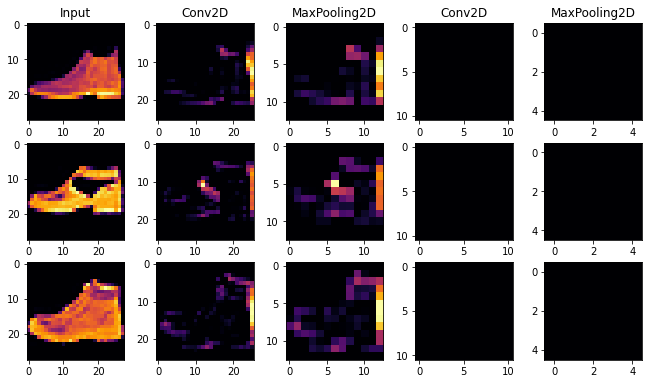

In [8]:
def show_conv_and_pool_layers(model):
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
    no_layers = len(layer_outputs) - 2 #number of layers including conv, pool and the input layer
    f, axarr = plt.subplots(3, no_layers, figsize=(9, 5))
    f.tight_layout(pad=0.1)
    for i in range(1, no_layers):
        f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[i - 1]
        axarr[0,i].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
        axarr[0,i].grid(False)
        f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[i - 1]
        axarr[1,i].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
        axarr[1,i].grid(False)
        f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[i - 1]
        axarr[2,i].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
        axarr[2,i].grid(False)

    for col in range(no_layers):
        if col == 0:
            axarr[0,col].set_title("Input")
        elif col%2 == 1:
            axarr[0,col].set_title("Conv2D")
        else:
            axarr[0,col].set_title("MaxPooling2D")
    for row, img in enumerate([FIRST_IMAGE, SECOND_IMAGE, THIRD_IMAGE]):
        axarr[row,0].imshow(test_images[img], cmap='inferno')
        axarr[row,0].grid(False)
        
show_conv_and_pool_layers(model)

## Exercises

### Exercise 1
Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

In [9]:
model = models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(128, activation='relu'),
                          tf.keras.layers.Dense(10, activation='softmax')])
model.summary() # shows the size and shape of the network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

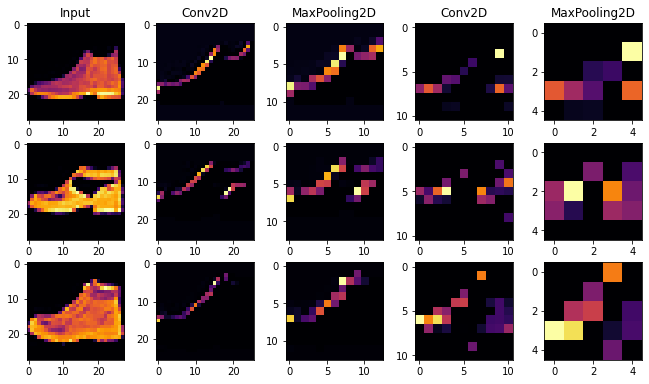

In [10]:
show_conv_and_pool_layers(model)

### Answer:
The accuracy is almost the same, but the training time is much longer.

### Exercise 2
Remove the final Convolution. What impact will this have on accuracy or training time?

In [11]:
model = models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(128, activation='relu'),
                          tf.keras.layers.Dense(10, activation='softmax')])
model.summary() # shows the size and shape of the network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3995 - accuracy: 0.8579
Epoch 2/5
1

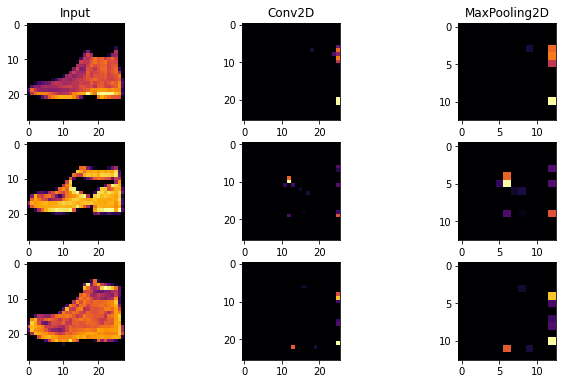

In [12]:
show_conv_and_pool_layers(model)

### Answer:
The accuracy is a bit higher and but the training time is lower.

### Exercise 3
How about adding more Convolutions? What impact do you think this will have? Experiment with it.

In [13]:
model = models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(128, activation='relu'),
                          tf.keras.layers.Dense(10, activation='softmax')])
model.summary() # shows the size and shape of the network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32)               

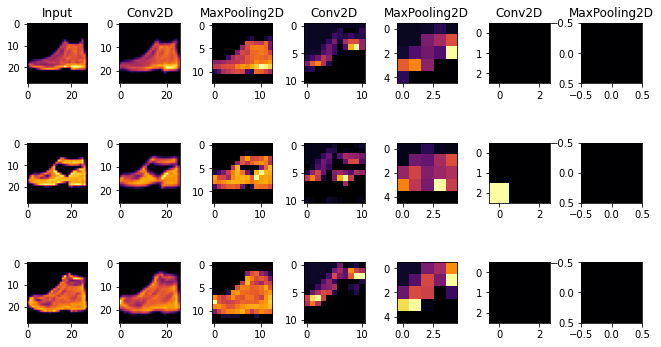

In [14]:
show_conv_and_pool_layers(model)

### Answer:
The training time is higher and but the accuracy is lower.

### Exercise 4
In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [15]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if(logs.get('accuracy') > 0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = MyCallback()

model = models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(128, activation='relu'),
                          tf.keras.layers.Dense(10, activation='softmax')])
model.summary() # shows the size and shape of the network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

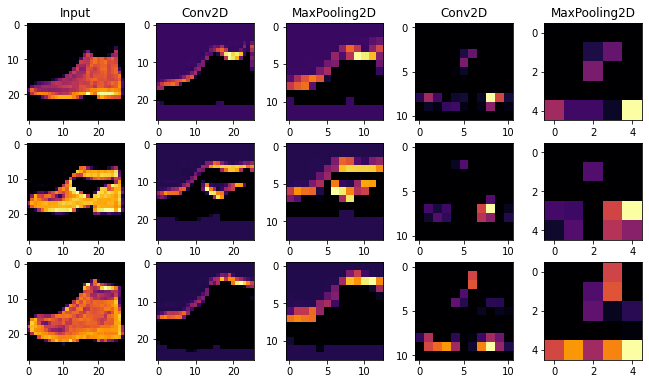

In [16]:
show_conv_and_pool_layers(model)

### Answer:
The implemnetation was successfull as before.

# Experiment with filters and pools

## Imports

In [17]:
import cv2
import numpy as np
from scipy import misc
img = misc.ascent()

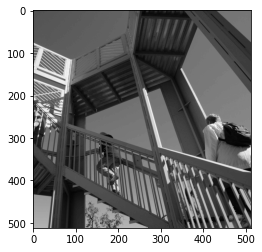

In [18]:
plt.grid(False)
plt.gray()
plt.imshow(img)
plt.show()

The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get the dimensions of the image so we can loop over it later.

In [19]:
img_transformed = np.copy(img)
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]

In [20]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#conv_filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
#conv_filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
conv_filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
#conv_filter = [ [1, 1, 1], [1, 2, 1], [1, 1, 1]]
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

To create a convolution we'll iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter. Finally we'll load the new value into the transformed image.

In [21]:
for i in range(1, size_x - 1):
    for j in range(1, size_y - 1):
        convolution = 0.0
        convolution += conv_filter[0][0]*img[i - 1, j - 1]
        convolution += conv_filter[0][1]*img[i - 1, j]
        convolution += conv_filter[0][2]*img[i - 1, j + 1]
        convolution += conv_filter[1][0]*img[i, j - 1]
        convolution += conv_filter[1][1]*img[i, j]
        convolution += conv_filter[1][2]*img[i, j + 1]
        convolution += conv_filter[2][0]*img[i + 1, j - 1]
        convolution += conv_filter[2][1]*img[i + 1, j]
        convolution += conv_filter[2][2]*img[i + 1, j + 1]
        convolution = convolution * weight #Normalizing the convolution value
        #Ensure the result is in the range 0-255
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255
        img_transformed[i, j] = convolution

Resulting image

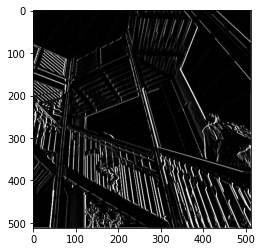

In [22]:
plt.gray()
plt.grid(False)
plt.imshow(img_transformed)
plt.show()

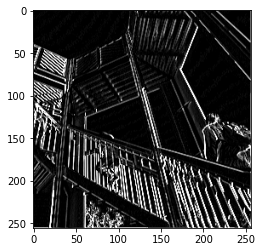

In [23]:
new_x = int(size_x/2)
new_y = int(size_y/2)
new_image = np.zeros((new_x, new_y))
for i in range(0, size_x, 2):
    for j in range(0, size_y, 2):
        pixels = []
        pixels.append(img_transformed[i,j])
        pixels.append(img_transformed[i,j + 1])
        pixels.append(img_transformed[i + 1,j])
        pixels.append(img_transformed[i + 1,j + 1])
        new_image[int(i/2), int(j/2)] = max(pixels)
        
# Plot the image
plt.gray()
plt.grid(False)
plt.imshow(new_image)
plt.show()            